Import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [2]:
parent_dir = '../../../data/philosopher/2'

df = pd.read_csv(f'{parent_dir}/aggregate_energy_results.csv')


Preview the Data

In [3]:
print("Data:")
print(df.shape)
df.head(15)

Data:
(5, 5)


,Iterations,N,M,Erlang Energy Consumption(J),Scala Energy Consumption(J)
0,10,50,100000,3841.496262,1694.572310
1,10,100,100000,7996.805201,3556.726210
2,10,500,100000,50882.206094,16595.962108
3,10,1000,100000,109850.084077,30933.848629
4,10,5000,100000,708676.678353,173407.021880


Add Custom Column for N and R

In [4]:
def format_number_str(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

In [5]:
# Combine N (Number of Actors) and R (Number of Rounds) into a new column for x-axis label
df['N_M'] = "(N=" + df['N'].apply(format_number_str) + ", M=" + df['M'].apply(format_number_str) + ")"
df.head(15)

,Iterations,N,M,Erlang Energy Consumption(J),Scala Energy Consumption(J),N_M
0,10,50,100000,3841.496262,1694.572310,"(N=50, M=100K)"
1,10,100,100000,7996.805201,3556.726210,"(N=100, M=100K)"
2,10,500,100000,50882.206094,16595.962108,"(N=500, M=100K)"
3,10,1000,100000,109850.084077,30933.848629,"(N=1K, M=100K)"
4,10,5000,100000,708676.678353,173407.021880,"(N=5K, M=100K)"


Visualize the Data

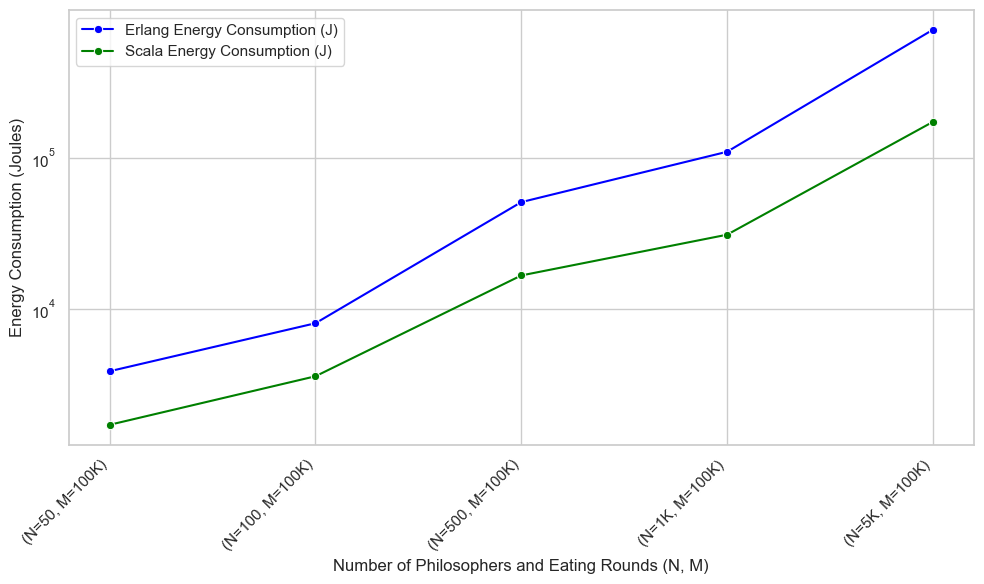

In [6]:
# Set the plot style
sns.set_theme(style="whitegrid", palette="muted")

# Plotting the energy consumption
plt.figure(figsize=(10, 6))

# Plot Erlang and Scala energy consumption
sns.lineplot(x="N_M", y="Erlang Energy Consumption(J)", data=df, marker='o', label="Erlang Energy Consumption (J)", color="blue")
sns.lineplot(x="N_M", y="Scala Energy Consumption(J)", data=df, marker='o', label="Scala Energy Consumption (J)", color="green")

# Adding labels and title
plt.xlabel("Number of Philosophers and Eating Rounds (N, M)")
plt.ylabel("Energy Consumption (Joules)")
# plt.title(" Erlang vs Scala Philosopher Benchmark Energy Consumption")
# plt.xscale("log")
plt.yscale("log")

# # Display legend
plt.legend()

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()
